In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

practice1

In [11]:
#設定參數
#自己設定
true_a = 2.0
true_b = 1.0
#題目要求
sigma0 = 3.0
x = np.linspace(1, 10, 10)
num_sets = 2000

In [12]:
#擬合函數
def linear_func(x, a, b):
    return a * x + b

#儲存變數
a_list = []
b_list = []
fit_results = []
all_data = []
chi2_values = []

In [ ]:
#產生資料&擬合
for i in range(num_sets):
    noise = np.random.normal(0, sigma0, size=len(x))
    y = true_a * x + true_b + noise
    all_data.append(y)

    popt, _ = curve_fit(linear_func, x, y)
    fit_y = linear_func(x, *popt)
    fit_results.append(popt)
    #為practice 3做準備
    a_list.append(popt[0])
    b_list.append(popt[1])
    #計算
    residuals = y - fit_y
    chi2_i = np.sum((residuals / sigma0)**2)
    chi2_values.append(chi2_i)

    # 印出全部結果
    print(f"第 {i+1} 組：a = {popt[0]:.4f}, b = {popt[1]:.4f}, χ² = {chi2_i:.4f}")


第 1 組：a = 1.9882, b = 1.1310, χ² = 7.6270
第 2 組：a = 2.0474, b = 1.4084, χ² = 4.6781
第 3 組：a = 2.2844, b = -0.9131, χ² = 11.2344
第 4 組：a = 2.4076, b = -2.1827, χ² = 11.8178
第 5 組：a = 1.7636, b = 3.2697, χ² = 9.3970
第 6 組：a = 2.3344, b = -0.3565, χ² = 4.9383
第 7 組：a = 2.3657, b = 0.6447, χ² = 17.6672
第 8 組：a = 1.9871, b = -1.1072, χ² = 7.7111
第 9 組：a = 2.1224, b = 0.8583, χ² = 6.2242
第 10 組：a = 2.3218, b = -0.2705, χ² = 3.7117
第 11 組：a = 2.3421, b = -1.9719, χ² = 8.0134
第 12 組：a = 1.7456, b = 2.0546, χ² = 6.2630
第 13 組：a = 1.7782, b = 3.4000, χ² = 5.4441
第 14 組：a = 1.9063, b = 0.9216, χ² = 6.3830
第 15 組：a = 2.1036, b = 0.2123, χ² = 6.7102
第 16 組：a = 1.2169, b = 5.9670, χ² = 5.8348
第 17 組：a = 1.9227, b = 0.0465, χ² = 6.5654
第 18 組：a = 1.9777, b = 0.0231, χ² = 11.1140
第 19 組：a = 2.0164, b = -0.3363, χ² = 8.6230
第 20 組：a = 1.7016, b = 0.5393, χ² = 6.0952
第 21 組：a = 2.4166, b = -0.5382, χ² = 5.6886
第 22 組：a = 2.1267, b = -1.3600, χ² = 8.3186
第 23 組：a = 2.2585, b = -0.8770, χ² = 7.9207
第 24 組

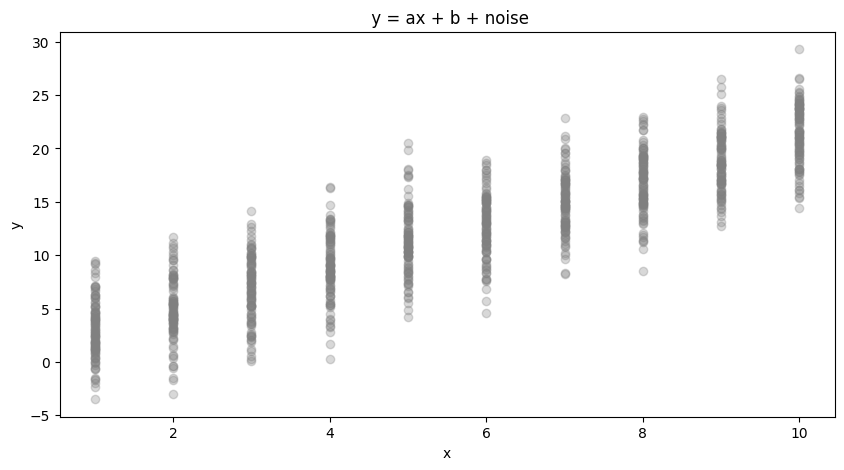

In [14]:
# 畫出資料點
plt.figure(figsize=(10, 5))
for i in range(100): 
    plt.plot(x, all_data[i], 'o', color='gray', alpha=0.3)
plt.title(' y = ax + b + noise')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("output1_1.pdf", transparent=True)
plt.show()

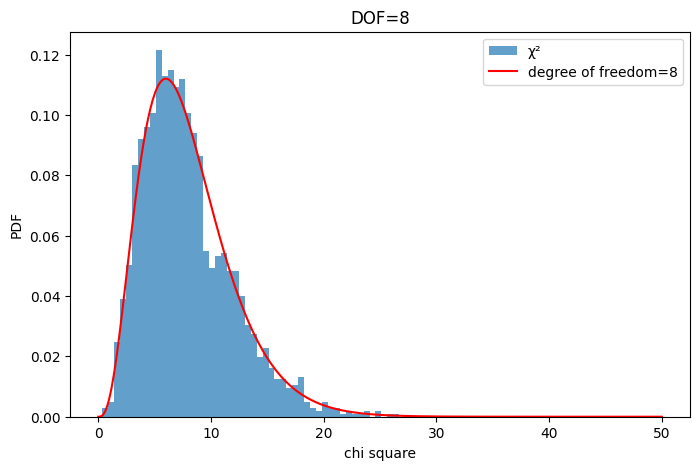

In [15]:
#chi square直方圖
plt.figure(figsize=(8, 5))
plt.hist(chi2_values, bins=50, density=True, alpha=0.7, label='χ²')
x_chi = np.linspace(0, 50, 500)
plt.plot(x_chi, chi2.pdf(x_chi, df=8), 'r-', label='degree of freedom=8')
plt.title('DOF=8')
plt.xlabel('chi square')
plt.ylabel('PDF')
plt.legend()
plt.savefig("output1_2.pdf", transparent=True)
plt.show()

practice 2

In [17]:
#假設chi2_values和fit_results是前面已算好的list
chi2_values = np.array(chi2_values)
fit_results = np.array(fit_results)

#根據chi square值排序，取得排序後的索引
sorted_indices = np.argsort(chi2_values)

#將排序後的擬合參數依區段分成五區（每區400組）
num_per_group = 400
a_groups = []
b_groups = []

for i in range(5):
    #取出這一區的index
    idx = sorted_indices[i * num_per_group : (i + 1) * num_per_group]
    a_groups.append(fit_results[idx, 0])  #取出a值
    b_groups.append(fit_results[idx, 1])  #取出b值


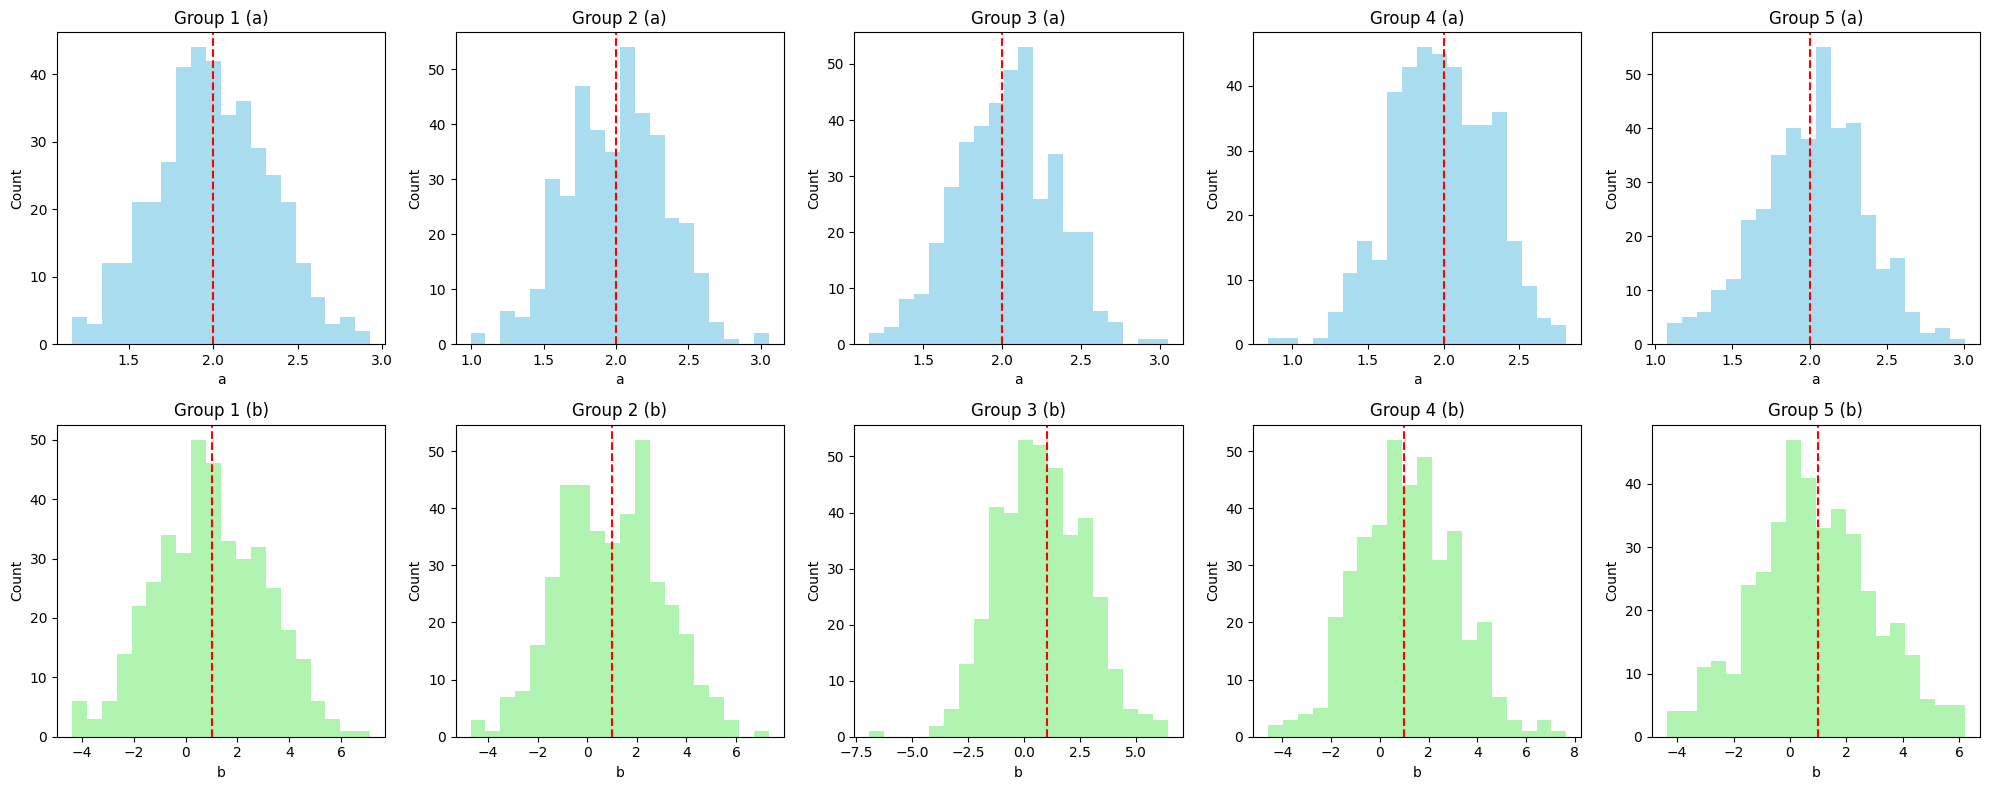

In [18]:
#畫出每一區的a和b直方圖
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(5):
    axs[0, i].hist(a_groups[i], bins=20, alpha=0.7, color='skyblue')
    axs[0, i].axvline(true_a, color='r', linestyle='--', label='True a')
    axs[0, i].set_title(f'Group {i+1} (a)')
    axs[0, i].set_xlabel('a')
    axs[0, i].set_ylabel('Count')

    axs[1, i].hist(b_groups[i], bins=20, alpha=0.7, color='lightgreen')
    axs[1, i].axvline(true_b, color='r', linestyle='--', label='True b')
    axs[1, i].set_title(f'Group {i+1} (b)')
    axs[1, i].set_xlabel('b')
    axs[1, i].set_ylabel('Count')
    

plt.tight_layout()
plt.savefig("output2_1.pdf", transparent=True)
#plt.axvline(np.mean(a_groups[i]), color='orange', linestyle='--', label='Mean a')
plt.show()


practice 3

In [19]:
a_list = np.array(a_list)
b_list = np.array(b_list)

In [20]:
#對每個x值，計算y的平均與標準差
y_all = np.array(all_data)  #shape = (2000, 10)
y_mean = np.mean(y_all, axis=0)  #對2000組取平均
y_std = np.std(y_all, axis=0, ddof=1)  #標準差

#x軸（每組共用）
x = np.linspace(1, 10, 10)

#使用y_mean擬合線性模型
def linear_model(x, a, b):
    return a * x + b



In [21]:
params, cov_matrix = curve_fit(linear_model, x, y_mean, sigma=y_std, absolute_sigma=True)
a_fit, b_fit = params

print(f"線性擬合參數: a = {a_fit:.3f}, b = {b_fit:.3f}")
print("共變異數矩陣:")
print(cov_matrix)
#[0, 0] represents the variance of a (slope)
#[1, 1] represents the variance of b (intercept)
#[0, 1] or [1, 0] represents the covariance between a and b, indicating how changes in a relate to changes in b.
#This indicates that when slope a increases, intercept b tends to decrease — a typical compensation relationship between linear parameters.

線性擬合參數: a = 2.007, b = 0.936
共變異數矩陣:
[[ 0.10835519 -0.59858954]
 [-0.59858954  4.19836536]]


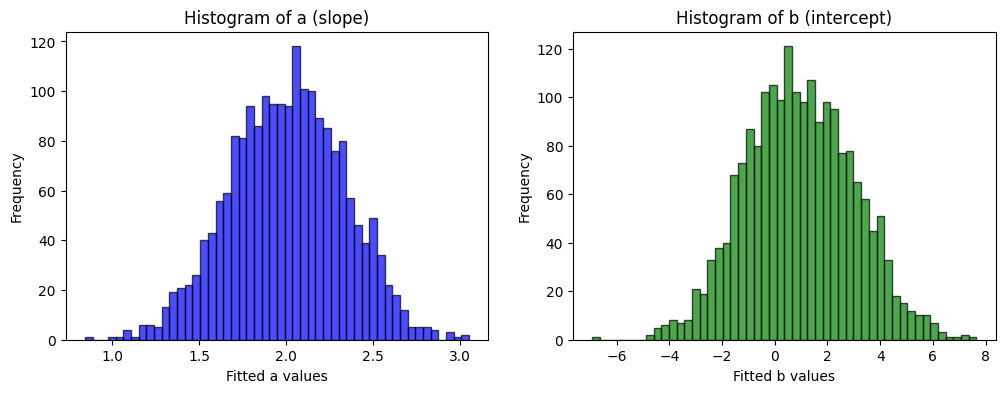

In [22]:
#繪製a與b的直方圖與2D直方圖
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(a_list, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Fitted a values")
plt.ylabel("Frequency")
plt.title("Histogram of a (slope)")
#plt.savefig("output.3_1.pdf", transparent=True)

plt.subplot(1, 2, 2)
plt.hist(b_list, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.xlabel("Fitted b values")
plt.ylabel("Frequency")
plt.title("Histogram of b (intercept)")
plt.savefig("output.3_1.pdf", transparent=True)
plt.show()

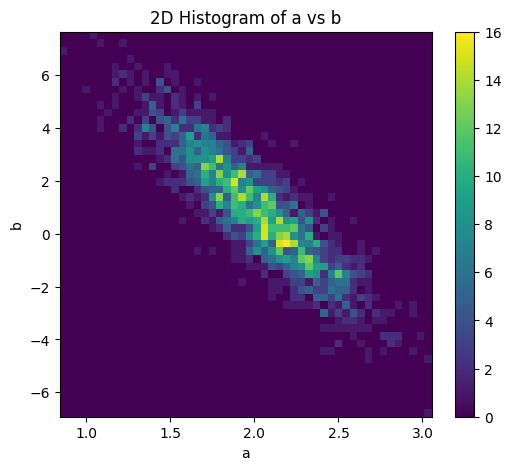

In [25]:
#2D直方圖
plt.figure(figsize=(6, 5))
hist2d = plt.hist2d(a_list, b_list, bins=50, cmap='viridis')
plt.xlabel("a")
plt.ylabel("b")
plt.title("2D Histogram of a vs b")
plt.colorbar()
plt.savefig("output3_2.pdf", transparent=True)
plt.show()

In [26]:
#計算共變異數與相關係數
cov_ab = np.cov(a_list, b_list)
corr_ab = np.corrcoef(a_list, b_list)

print("Covariance matrix of [a, b]:")
print(cov_ab)
print("Correlation coefficient matrix of [a, b]:")
print(corr_ab)

#擬合a vs b的關係線，觀察是否線性
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(a_list, b_list)

print(f"Linear fit b = m * a + c:\nSlope = {slope:.3f}, Intercept = {intercept:.3f}")
print(f"Correlation coefficient (r) = {r_value:.3f}, R² = {r_value**2:.3f}")

Covariance matrix of [a, b]:
[[ 0.10806176 -0.59461343]
 [-0.59461343  4.19981735]]
Correlation coefficient matrix of [a, b]:
[[ 1.         -0.88263977]
 [-0.88263977  1.        ]]
Linear fit b = m * a + c:
Slope = -5.503, Intercept = 11.981
Correlation coefficient (r) = -0.883, R² = 0.779
